# Validation methods

In this notebook we train a k nearest neighbors classificer on the (real) dataset for breast tumour instances. We show how the hyperparameters can be tuned using each of the methodologies we have discussed.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

C:\Users\frbj\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Here we load and investigate the data:

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

### Train-test methodology

In [3]:
# Divide the data into training and test
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

We train several k-nearest-neighbor models on the data with various values of k, and plot the train and test accuracies:

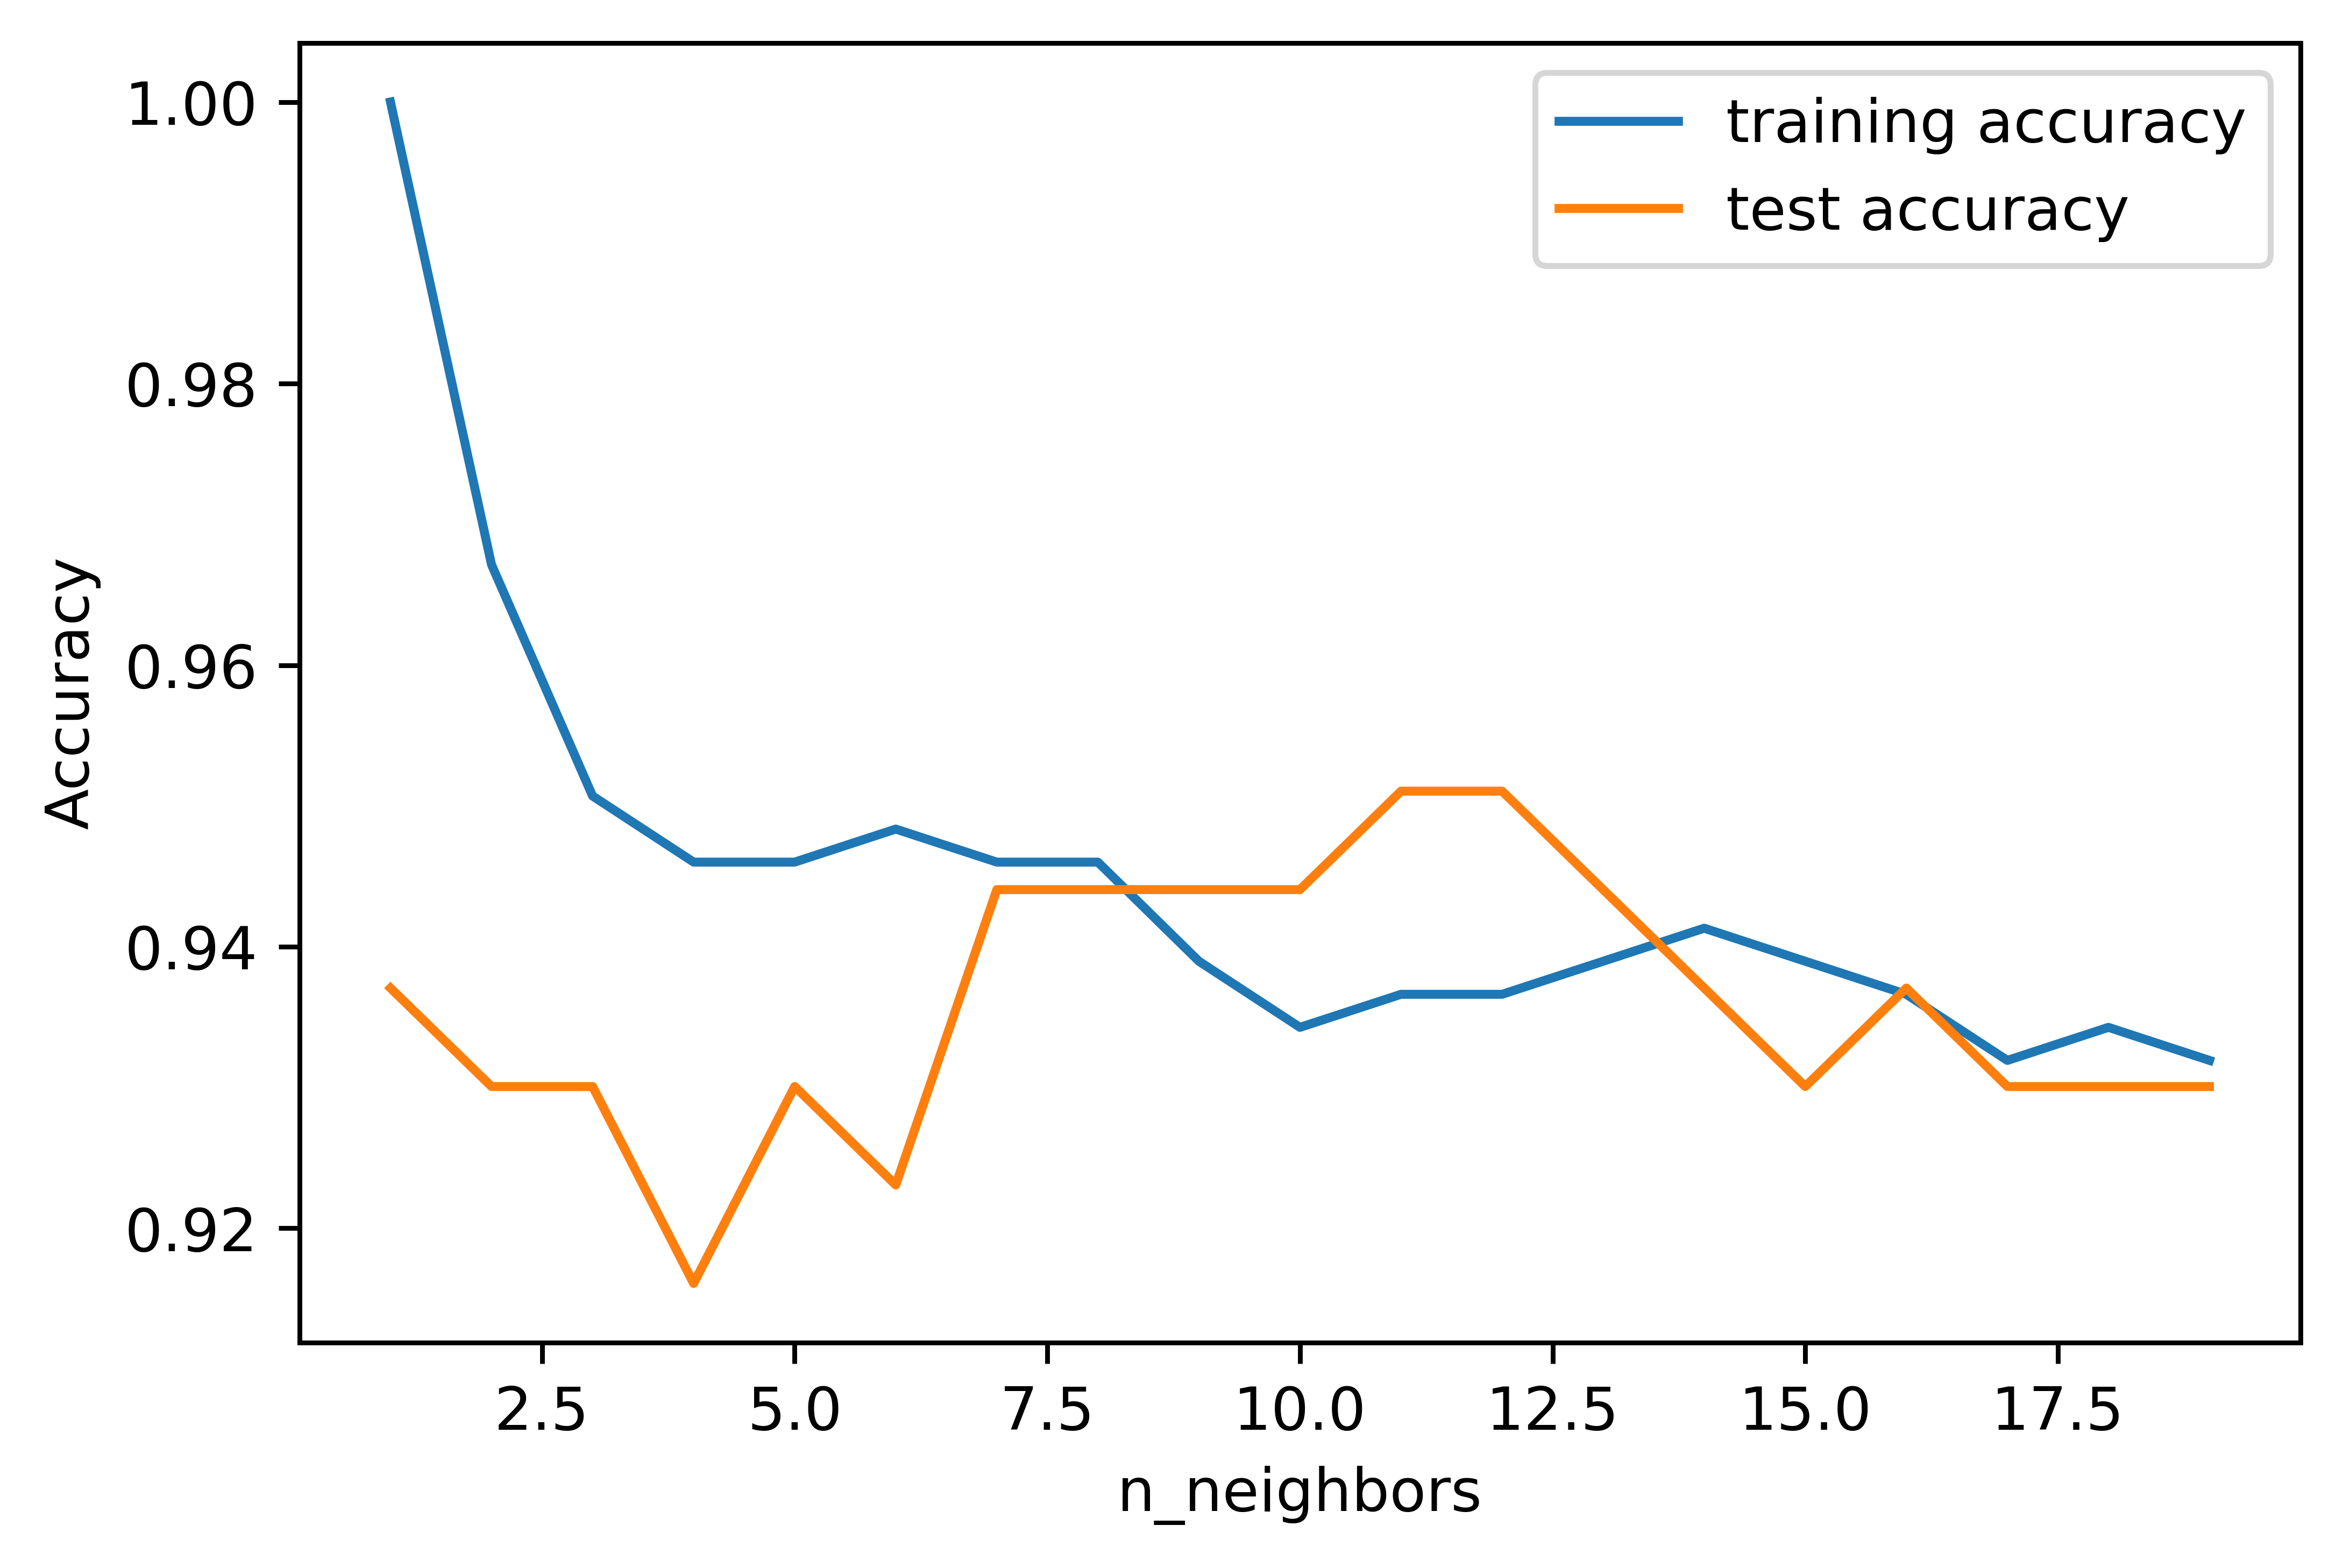

In [5]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.figure(dpi = 800)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

The graph shows that we achieve a good trade-off between high accuracy and low overfitting around n_neighbors = 11 or 12, so this is probably one of these values we should use for our final model! 

### Train-validation-test methodology

Divide the data into training data, validation data, and test data

In [6]:
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, 
                                                          cancer.target,
                                                          random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, 
                                                  random_state=43)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:319
Size of validation set:107
Size of test set:143


Find the best number of neighbors using the validation set

In [7]:
best_score = 0
for num_neighbors in range(1,15):
    # Learn the model with a certain number of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)
    
    # Evaluate the model
    score = knn.score(X_val, y_val)
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(
    best_num_neighbors))
print("Best score on validation set: {}".format(best_score))
print("Score on training/validation set: {}".format(
    knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, 
                                               y_test)))

Best number of neighbors found: 8
Best score on validation set: 0.9626168224299065
Score on training/validation set: 0.9389671361502347
Score on test set: 0.958041958041958


### Cross-validation

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
# Fix the parameter space
parameters = {'n_neighbors': range(1,15)}
grid_search = GridSearchCV(KNeighborsClassifier(), 
                           parameters, cv=5, 
                           return_train_score=True)
# To do leave-one-out cross-validation instead, uncomment the following:
### from sklearn.model_selection import LeaveOneOut
### loo = LeaveOneOut()
### grid_search = GridSearchCV(KNeighborsClassifier(), 
###    parameters, cv=loo, return_train_score=True)

Divide the data into training data and test data (no validation data!)

In [10]:
# Divide into train and test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=42)

Perform the search; all results are stored within `grid_search`

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)}, return_train_score=True)

Print some results

In [12]:
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best cross-validation score: {}".format(grid_search.best_score_))
print("Best estimator: {}".format(grid_search.best_estimator_))

Test score: 0.96
Best cross-validation score: 0.9294391244870042
Best estimator: KNeighborsClassifier(n_neighbors=8)


In [13]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000589,0.000481,0.003103,0.001111,1,{'n_neighbors': 1},0.965116,0.870588,0.905882,0.894118,...,0.905964,0.031721,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000400,0.000490,0.004433,0.001023,2,{'n_neighbors': 2},0.953488,0.905882,0.917647,0.882353,...,0.913051,0.023244,12,0.958824,0.964809,0.967742,0.970674,0.970674,0.966545,0.004431
2,0.000816,0.000409,0.005418,0.000447,3,{'n_neighbors': 3},0.953488,0.882353,0.976471,0.882353,...,0.920109,0.038326,6,0.938235,0.956012,0.938416,0.953079,0.944282,0.946005,0.007363
3,0.000796,0.000398,0.006015,0.000632,4,{'n_neighbors': 4},0.953488,0.882353,0.952941,0.858824,...,0.910698,0.037771,13,0.929412,0.956012,0.935484,0.938416,0.935484,0.938962,0.009015
4,0.000382,0.000469,0.005411,0.000830,5,{'n_neighbors': 5},0.953488,0.870588,0.976471,0.858824,...,0.915404,0.045595,10,0.917647,0.950147,0.929619,0.935484,0.935484,0.933676,0.010500
5,0.000599,0.000489,0.004796,0.001172,6,{'n_neighbors': 6},0.965116,0.882353,0.964706,0.882353,...,0.922435,0.036999,4,0.917647,0.944282,0.920821,0.947214,0.938416,0.933676,0.012169
6,0.000199,0.000397,0.004802,0.001467,7,{'n_neighbors': 7},0.988372,0.870588,0.964706,0.882353,...,0.924733,0.045663,3,0.920588,0.944282,0.926686,0.941349,0.938416,0.934264,0.009080
7,0.000400,0.000490,0.004652,0.001574,8,{'n_neighbors': 8},0.988372,0.870588,0.976471,0.894118,...,0.929439,0.045902,1,0.917647,0.941349,0.923754,0.935484,0.938416,0.931330,0.009083
8,0.000000,0.000000,0.003242,0.000787,9,{'n_neighbors': 9},0.988372,0.870588,0.964706,0.894118,...,0.922380,0.045665,5,0.920588,0.938416,0.923754,0.929619,0.932551,0.928986,0.006324
9,0.000609,0.000497,0.004456,0.000774,10,{'n_neighbors': 10},0.988372,0.882353,0.964706,0.894118,...,0.927086,0.041734,2,0.920588,0.935484,0.923754,0.932551,0.935484,0.929572,0.006218


This automatic grid search is extremely helpful when we have more than one hyperparameter - such as in a decision tree.

In [14]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth': range(1,10), 
              'max_leaf_nodes': range(2,10), 
              'min_samples_split': range(2,20)}
grid_search = GridSearchCV(DecisionTreeClassifier(), 
                           parameters, cv=5, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42)
grid_search.fit(X_train, y_train)
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best cross-validation score: {}".format(grid_search.best_score_))
print("Best estimator: {}".format(grid_search.best_estimator_))

Test score: 0.95
Best cross-validation score: 0.9365253077975376
Best estimator: DecisionTreeClassifier(max_depth=3, max_leaf_nodes=9, min_samples_split=12)
